# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime
present = datetime.now()

# Output File (CSV)
output= "output_data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Create empty lists for data to populate & a city count
city_name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []
city_number = []
city_count = 0   #we only want 500 so need to keep a count

#Print Start
print ("Beginning Data Retrival")
print ("-------------------------------")

#Make call
for city in cities:
    city_count = city_count + 1
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(city)
        print(f"Processing Record {city_count}|{city}")
        time.sleep(.1)
    except KeyError:
        print ("City not found. Skipping...")
print ("-------------------------------")
print ("Data Retrieval Complete")
print ("-------------------------------")

Beginning Data Retrival
-------------------------------
Processing Record 1|victoria
Processing Record 2|busselton
Processing Record 3|bhag
Processing Record 4|namibe
Processing Record 5|bluff
Processing Record 6|east london
Processing Record 7|coquimbo
Processing Record 8|hithadhoo
Processing Record 9|takoradi
Processing Record 10|scarborough
Processing Record 11|vaini
Processing Record 12|deputatskiy
Processing Record 13|tessalit
Processing Record 14|avarua
Processing Record 15|alofi
Processing Record 16|tuatapere
Processing Record 17|ranong
Processing Record 18|rikitea
Processing Record 19|thompson
Processing Record 20|dingle
Processing Record 21|tucupita
Processing Record 22|beyneu
Processing Record 23|atuona
City not found. Skipping...
Processing Record 25|georgetown
Processing Record 26|diamantino
Processing Record 27|kodiak
Processing Record 28|hobart
Processing Record 29|nikolskoye
Processing Record 30|cockburn town
Processing Record 31|esperance
Processing Record 32|albany
Cit

Processing Record 266|maniitsoq
Processing Record 267|malkangiri
Processing Record 268|isangel
Processing Record 269|nome
Processing Record 270|micheweni
Processing Record 271|waipawa
Processing Record 272|trapani
Processing Record 273|warrnambool
Processing Record 274|lanja
Processing Record 275|zyryanovsk
Processing Record 276|pajapan
Processing Record 277|te anau
Processing Record 278|waycross
Processing Record 279|natal
Processing Record 280|kaitangata
Processing Record 281|hay river
Processing Record 282|dawei
Processing Record 283|kathu
Processing Record 284|piacabucu
Processing Record 285|huarmey
City not found. Skipping...
Processing Record 287|beringovskiy
Processing Record 288|gibara
Processing Record 289|port lincoln
Processing Record 290|ahipara
Processing Record 291|marsa matruh
Processing Record 292|klintsy
Processing Record 293|turukhansk
Processing Record 294|moramanga
Processing Record 295|cutervo
Processing Record 296|mount gambier
Processing Record 297|porto novo
Pro

Processing Record 531|nova odesa
Processing Record 532|nizwa
Processing Record 533|tuy hoa
Processing Record 534|pierre
Processing Record 535|veraval
Processing Record 536|batemans bay
Processing Record 537|hasaki
Processing Record 538|coruripe
Processing Record 539|kruisfontein
Processing Record 540|bahia blanca
City not found. Skipping...
Processing Record 542|caravelas
Processing Record 543|shimoda
Processing Record 544|katsuura
Processing Record 545|mezen
Processing Record 546|beloha
Processing Record 547|goba
City not found. Skipping...
Processing Record 549|kidal
Processing Record 550|chama
Processing Record 551|pangody
Processing Record 552|tigil
Processing Record 553|kurkino
Processing Record 554|bambanglipuro
Processing Record 555|the valley
Processing Record 556|virginia beach
Processing Record 557|todos santos
Processing Record 558|hofn
Processing Record 559|vilhena
Processing Record 560|tautira
City not found. Skipping...
Processing Record 562|gayny
Processing Record 563|ko

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":city_name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temperature":temp,
    "Wind Speed":wind_speed}
    
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,victoria,75,BN,1573441544,74,5.28,115.24,86.68,3.36
1,busselton,0,AU,1573441544,29,-33.64,115.35,70.93,11.12
2,bhag,96,PK,1573441545,21,29.04,67.82,72.48,2.46
3,namibe,0,AO,1573441545,86,-15.19,12.15,74.86,12.73
4,bluff,0,AU,1573441545,11,-23.58,149.07,89.31,4.38


In [5]:
weather_df.count()

City               541
Cloudiness         541
Country            541
Date               541
Humidity           541
Latitude           541
Longitude          541
Max Temperature    541
Wind Speed         541
dtype: int64

In [17]:
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv(output+"cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

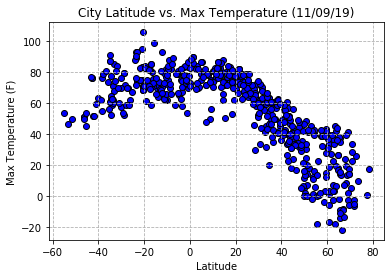

In [18]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"],edgecolor="black",facecolors="b")
plt.title("City Latitude vs. Max Temperature (present.strftime('%m/%d/%Y')")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (ls="--")
plt.savefig("Images/LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

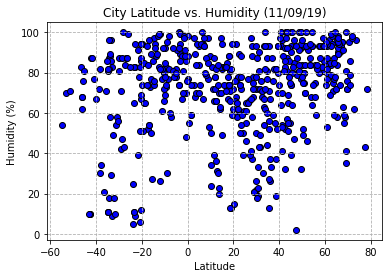

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolor="black",facecolors="b")
plt.title("City Latitude vs. Humidity (present.strftime('%m/%d/%Y')")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (ls="--")
plt.savefig("Images/LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

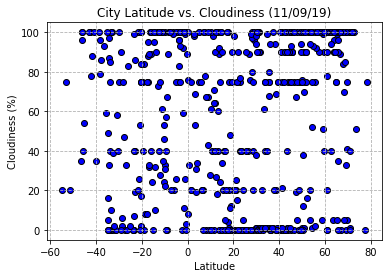

In [12]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolor="black",facecolors="b")
plt.title("City Latitude vs. Cloudiness (present.strftime('%m/%d/%Y')")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (ls="--")
plt.savefig("Images/LatvsClouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

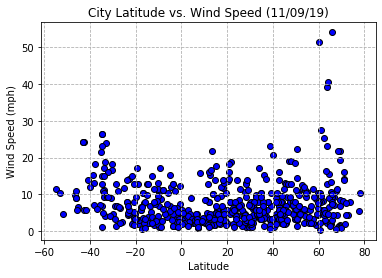

In [13]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolor="black",facecolors="b")
plt.title("City Latitude vs. Wind Speed (present.strftime('%m/%d/%Y')")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (ls="--")
plt.savefig("Images/LatvsWind.png")
plt.show()